<a href="https://colab.research.google.com/github/jhcool1988/teamdata/blob/master/%EC%97%B0%EB%B4%89%EC%98%88%EC%B8%A1_%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 한글설정 1 폰트설치
!sudo apt-get install -y fonts-nanum  # 폰트설치
!sudo fc-cache -fy    # 폰트캐시 재구성
!rm ~/.cache/matplotlib -rf # matplotlib 캐시 제거

# 설치가 끝나면 코렙의 런타임을 다시 시작함

# 한글설정 2
plt.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (41.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [3]:
sal = pd.read_csv('https://raw.githubusercontent.com/jhcool1988/teamdata/master/soccerVF.csv')
sal.head(5)

,playername,marketvaluepound,season,age,lgrank,MP,starts,min,goal,assist,sh,sot,sotp,gsh,cmp,cmpp,cmpsp,cmpmp,cmplp,crs,ground,low,high,left,right,head,off,int,block,sca,passlive,drib,gca,gcapasslive,gcadrib,tkl,tklw,press,pressp,touches,succp,targ,rec,recp,miscon,subs,fls,recov,aerialwonp
0,Tammy Abraham,9000000.0,2017-2018,19.0,18th,31.0,15.0,"1,726",5.0,1.0,43.0,14.0,32.6,0.12,208.0,67.3,33.3,74.2,52.2,13.0,202.0,49.0,58.0,24.0,222.0,35.0,0.0,11.0,Matches,31.0,20.0,6.0,2.0,1.0,0.0,11.0,5.0,178.0,32.6,535.0,57.8,691.0,392.0,56.7,60.0,16.0,15.0,61.0,50.0
1,Tammy Abraham,18000000.0,2018-2019,20.0,5th,38.0,38.0,"3,228",25.0,3.0,107.0,58.0,54.2,0.19,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,30.0,NaN,NaN
2,Tammy Abraham,36000000.0,2019-2020,21.0,4th,34.0,25.0,"2,215",15.0,3.0,88.0,35.0,39.8,0.17,288.0,69.7,48.1,72.9,73.6,10.0,259.0,82.0,72.0,31.0,306.0,18.0,1.0,8.0,Matches,47.0,33.0,6.0,10.0,4.0,3.0,14.0,10.0,429.0,30.3,740.0,58.3,1076.0,496.0,46.1,71.0,9.0,17.0,95.0,37.6
3,Che Adams,2250000.0,2017-2018,21.0,19th,30.0,16.0,"1,541",5.0,2.0,47.0,20.0,42.6,0.11,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,28.0,NaN,NaN
4,Che Adams,6300000.0,2018-2019,22.0,17th,46.0,43.0,"3,728",22.0,4.0,110.0,55.0,50.0,0.19,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,74.0,NaN,NaN


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


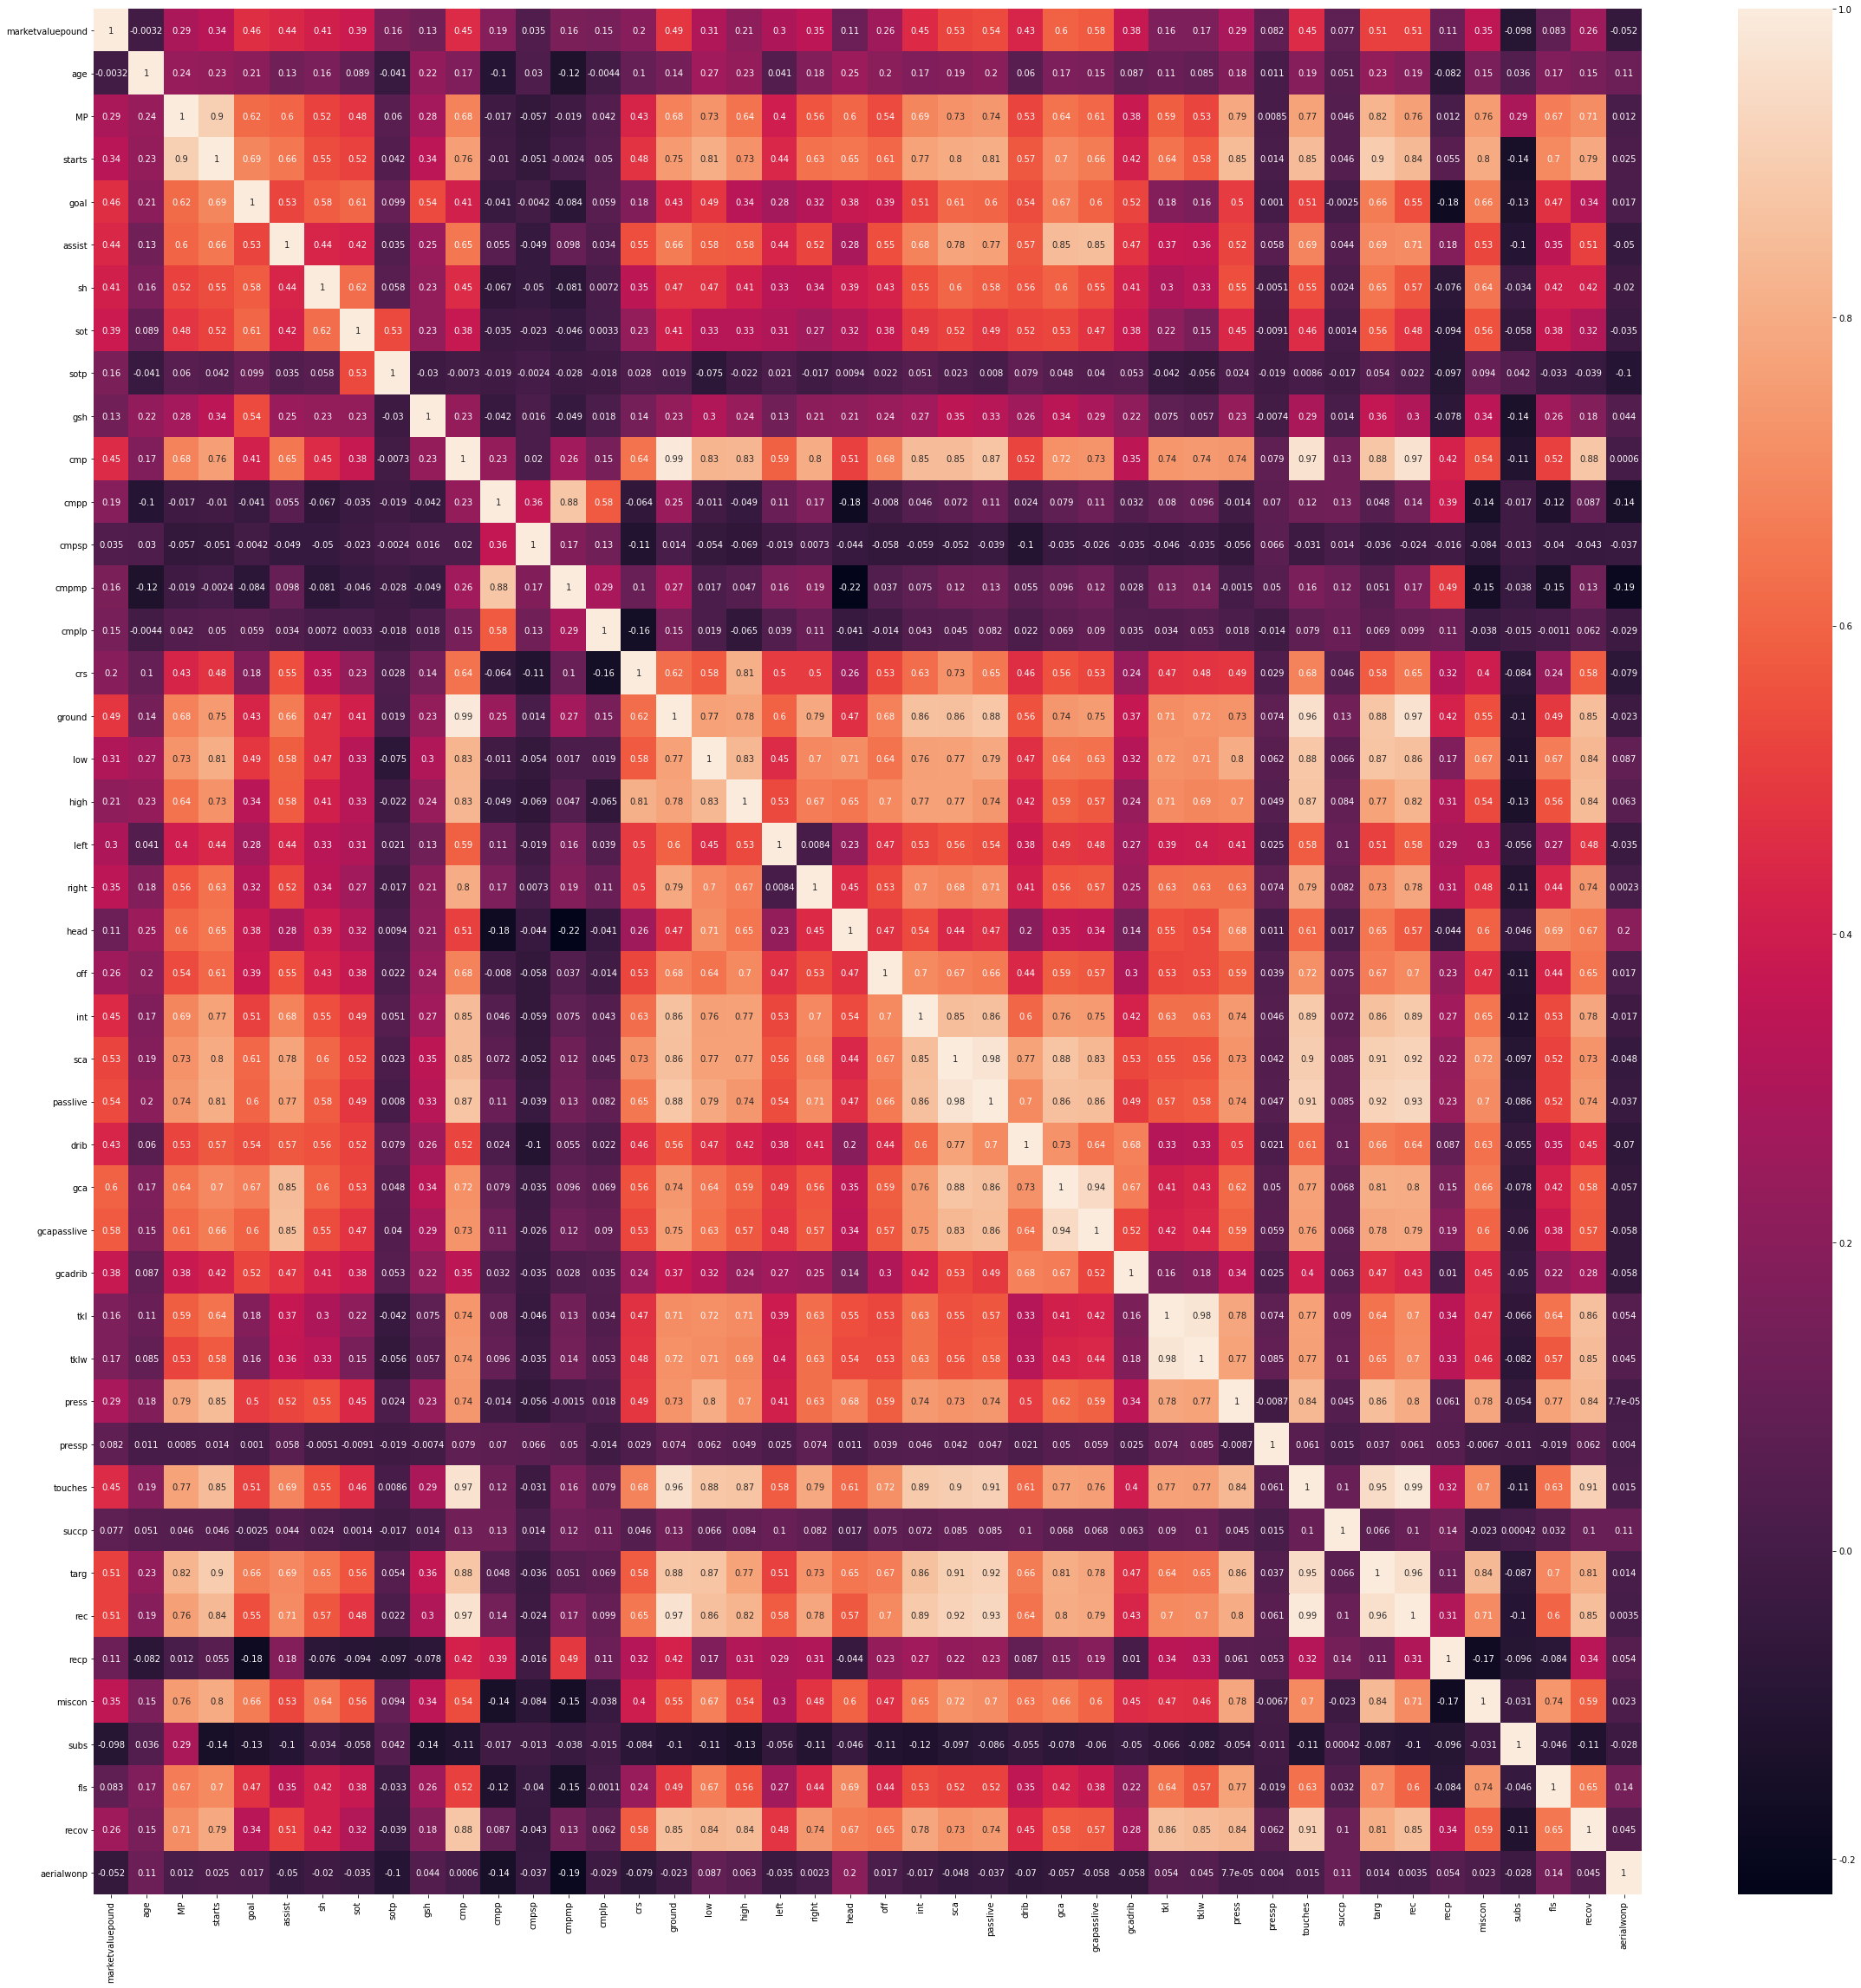

In [4]:
bscorr = sal.corr()
fig, axs = plt.subplots(figsize = (40,40))

sns.heatmap(bscorr, annot=True)

In [5]:
sal = sal[['marketvaluepound','goal','cmp','int','sca','passlive','drib','gca','gcapasslive','touches','targ','rec']]
sal.head(5)

,marketvaluepound,goal,cmp,int,sca,passlive,drib,gca,gcapasslive,touches,targ,rec
0,9000000.0,5.0,208.0,11.0,31.0,20.0,6.0,2.0,1.0,535.0,691.0,392.0
1,18000000.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36000000.0,15.0,288.0,8.0,47.0,33.0,6.0,10.0,4.0,740.0,1076.0,496.0
3,2250000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6300000.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.pairplot(sal)

In [6]:
result = ols('marketvaluepound~goal+cmp+gca', data=sal).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       marketvaluepound   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     238.6
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          1.59e-118
Time:                        16:16:11   Log-Likelihood:                -19393.
No. Observations:                1074   AIC:                         3.879e+04
Df Residuals:                    1070   BIC:                         3.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.731e+05   8.46e+05      0.205      0.8

In [ ]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
model = ols('marketvaluepound~goal+cmp+gca',data=sal)
print(model.exog_names) # 독립변수 이름 확인

print(variance_inflation_factor(model.exog,1))
print(variance_inflation_factor(model.exog,2))
print(variance_inflation_factor(model.exog,3))


['Intercept', 'goal', 'cmp', 'gca']
1.7447358481339688
1.9087779627105728
2.823409647968725


In [ ]:
predsal = 1.731e+05 + 1.106e+06 * 11 + 7404.0246 * 705 + 1.264e+06 * 22
predsal

45366937.342999995

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
sal.drop('playername', axis=1, inplace=True)
sal.drop('season', axis=1, inplace=True)
sal.drop('lgrank', axis=1, inplace=True)

KeyError: ignored

In [19]:
sal = sal[['marketvaluepound','goal','cmp','gca']]
sal.head(5)

,marketvaluepound,goal,cmp,gca
0,9000000.0,5.0,208.0,2.0
1,18000000.0,25.0,0.0,0.0
2,36000000.0,15.0,288.0,10.0
3,2250000.0,5.0,0.0,0.0
4,6300000.0,22.0,0.0,0.0


In [13]:
sal

,marketvaluepound,goal,cmp,int,sca,passlive,drib,gca,gcapasslive,touches,targ,rec
0,9000000.0,5.0,208.0,11.0,31.0,20.0,6.0,2.0,1.0,535.0,691.0,392.0
1,18000000.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36000000.0,15.0,288.0,8.0,47.0,33.0,6.0,10.0,4.0,740.0,1076.0,496.0
3,2250000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6300000.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3295,2520000.0,0.0,548.0,8.0,11.0,10.0,0.0,0.0,0.0,719.0,537.0,502.0
3296,180000.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,6.0,6.0
3297,36000000.0,6.0,1312.0,35.0,94.0,72.0,6.0,12.0,10.0,1897.0,1560.0,1426.0
3298,45000000.0,7.0,1801.0,42.0,107.0,83.0,4.0,18.0,10.0,2472.0,2207.0,1977.0


In [16]:
sal = sal.fillna(0)

In [26]:
data = sal.iloc[:, 1:4]
target = sal.iloc[:, 0]
print(data)
print(target)


      goal     cmp   gca
0      5.0   208.0   2.0
1     25.0     0.0   0.0
2     15.0   288.0  10.0
3      5.0     0.0   0.0
4     22.0     0.0   0.0
...    ...     ...   ...
3295   0.0   548.0   0.0
3296   0.0     5.0   0.0
3297   6.0  1312.0  12.0
3298   7.0  1801.0  18.0
3299   3.0   911.0  10.0

[3300 rows x 3 columns]
0        9000000.0
1       18000000.0
2       36000000.0
3        2250000.0
4        6300000.0
           ...    
3295     2520000.0
3296      180000.0
3297    36000000.0
3298    45000000.0
3299    44550000.0
Name: marketvaluepound, Length: 3300, dtype: float64


In [ ]:
age_mean = np.mean(titanic2['Age'])
titanic2['Age'].fillna(age_mean, inplace=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    train_size=0.7, test_size=0.3)

In [30]:
# 머신러닝 알고리즘 적용 1 - 의사결정나무
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
print('정확도 : ', accuracy_score(y_test, pred))   # 0.39191919191919194

정확도 :  0.39191919191919194


In [46]:
# 머신러닝 알고리즘 적용 2 - 로지스틱 회귀
lgclf = LogisticRegression()
lgclf.fit(X_train,y_train)
pred = lgclf.predict(X_test)
print('정확도 : ', accuracy_score(y_test, pred))  # 정확도 :  0.5131313131313131

정확도 :  0.5131313131313131


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
# 머신러닝 알고리즘 적용 3 - 랜덤 포레스트
rfclf = RandomForestClassifier()
rfclf.fit(X_train,y_train)
pred = rfclf.predict(X_test)
print('정확도 : ', accuracy_score(y_test, pred))  # 정확도 :  0.4171717171717172

정확도 :  0.4171717171717172


In [33]:
# 머신러닝 알고리즘 적용 4 - KNN
knnclf = KNeighborsClassifier(n_neighbors=15)
knnclf.fit(X_train,y_train)
pred = knnclf.predict(X_test)
print('정확도 : ', accuracy_score(y_test, pred))  # 정확도 :  0.5181818181818182

knnclf = KNeighborsClassifier(n_neighbors=10)
knnclf.fit(X_train,y_train)
pred = knnclf.predict(X_test)
print('정확도 : ', accuracy_score(y_test, pred))  # 정확도 :  0.5161616161616162


knnclf = KNeighborsClassifier(n_neighbors=12)
knnclf.fit(X_train,y_train)
pred = knnclf.predict(X_test)
print('정확도 : ', accuracy_score(y_test, pred))  # 정확도 :  0.5171717171717172

정확도 :  0.5181818181818182
정확도 :  0.5161616161616162
정확도 :  0.5171717171717172


In [35]:
# 교차검증을 통해 분석
dtclf = DecisionTreeClassifier()
scores = cross_val_score(dtclf, data, target, cv=10, scoring='accuracy')
print(scores)
# [0.3969697  0.34848485 0.34242424 0.33636364 0.41212121 0.35454545
#  0.37575758 0.33636364 0.42424242 0.36060606]

print(np.mean(scores))
# 0.36878787878787883

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.3969697  0.34848485 0.34242424 0.33636364 0.41212121 0.35454545
 0.37575758 0.33636364 0.42424242 0.36060606]
0.36878787878787883


In [39]:
lgclf = LogisticRegression()
scores = cross_val_score(lgclf, data, target, cv=10, scoring='accuracy')
print(scores)
# [0.51515152 0.51515152 0.51212121 0.51212121 0.5030303  0.51212121
#  0.51515152 0.50606061 0.51515152 0.5030303 ]


print(np.mean(scores))
# 0.5109090909090909

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

[0.51515152 0.51515152 0.51212121 0.51212121 0.5030303  0.51212121
 0.51515152 0.50606061 0.51515152 0.5030303 ]
0.5109090909090909


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
rfclf = RandomForestClassifier()
scores = cross_val_score(rfclf, data, target, cv=10, scoring='accuracy')
print(scores)
# [0.41212121 0.41515152 0.37878788 0.38181818 0.45757576 0.41818182
#  0.41515152 0.38484848 0.42424242 0.4030303 ]

print(np.mean(scores))
# 0.40909090909090906

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.41212121 0.41515152 0.37878788 0.38181818 0.45757576 0.41818182
 0.41515152 0.38484848 0.42424242 0.4030303 ]
0.40909090909090906


In [38]:
knnclf = KNeighborsClassifier(n_neighbors=12)
scores = cross_val_score(knnclf, data, target, cv=10, scoring='accuracy')
print(scores)
# [0.51515152 0.51515152 0.51515152 0.46969697 0.51212121 0.47272727
#  0.45454545 0.51515152 0.51212121 0.51212121]

print(np.mean(scores))
# 0.49939393939393933

[0.51515152 0.51515152 0.51515152 0.46969697 0.51212121 0.47272727
 0.45454545 0.51515152 0.51212121 0.51212121]
0.49939393939393933


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [49]:
# 실제값을 입력해서 생존 결과 예측하기
# 독립변수 : 좌석등급, 성별, 나이, 형제여부, 부모여부, 요금, 승선위치
print(type(X_test[:1]))
mydata = np.array([[11,705,22]])

pred = lgclf.predict(mydata)
print(pred)    # [0]

<class 'pandas.core.frame.DataFrame'>
[0.]
